<a href="https://colab.research.google.com/github/paulopreto/REF0161-Biomecanica2/blob/main/Biomecanica2023/cinematica_linear/vel_acel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import plotly.graph_objects as go

# Dados
t = np.linspace(0, 10, 1000)  # tempo de 0 a 10 segundos
d = 100  # metros

# Suposições
tempo_aceleracao = 4  # segundos para atingir a velocidade máxima
a = 2 * d / (tempo_aceleracao**2 + 2*tempo_aceleracao*(10 - tempo_aceleracao))  # aceleração
v_max = a * tempo_aceleracao  # velocidade máxima

# Posição x Tempo
s = np.piecewise(t, [t < tempo_aceleracao, t >= tempo_aceleracao],
                 [lambda t: 0.5 * a * t**2,
                  lambda t: 0.5 * a * tempo_aceleracao**2 + v_max * (t - tempo_aceleracao)])

# Velocidade x Tempo
v = np.piecewise(t, [t < tempo_aceleracao, t >= tempo_aceleracao], [lambda t: a * t, lambda t: v_max])

# Aceleração x Tempo
acel = np.piecewise(t, [t < tempo_aceleracao, t >= tempo_aceleracao], [a, 0])

# Criando os gráficos interativos
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=t, y=s, mode='lines', name='Posição (m)'))
fig1.update_layout(title='Posição x Tempo', xaxis_title='Tempo (s)', yaxis_title='Posição (m)')
fig1.show()



In [ ]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=t, y=v, mode='lines', name='Velocidade (m/s)'))
fig2.update_layout(title='Velocidade x Tempo', xaxis_title='Tempo (s)', yaxis_title='Velocidade (m/s)')
fig2.show()

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

# Dados
data = {
    'Athlete': ['GATLIN', 'COLEMAN', 'BOLT', 'BLAKE', 'SIMBINE', 'VICAUT', 'PRESCOD', 'SU'],
    'RT': [0.138, 0.123, 0.183, 0.137, 0.141, 0.152, 0.145, 0.224],
    '0-10 m': [1.88, 1.87, 1.96, 1.89, 1.92, 1.95, 2.04, 2.03],
    '10-20 m': [1.02, 1.00, 1.02, 1.03, 1.03, 1.03, 1.05, 1.03],
    '20-30 m': [0.91, 0.90, 0.90, 0.91, 0.92, 0.90, 0.92, 0.92],
    '30-40 m': [0.90, 0.88, 0.88, 0.90, 0.92, 0.89, 0.92, 0.91],
    '40-50 m': [0.88, 0.87, 0.88, 0.89, 0.87, 0.87, 0.89, 0.89],
    '50-60 m': [0.86, 0.86, 0.85, 0.88, 0.84, 0.87, 0.86, 0.89],
    '60-70 m': [0.86, 0.88, 0.85, 0.87, 0.86, 0.88, 0.86, 0.89],
    '70-80 m': [0.87, 0.88, 0.86, 0.88, 0.87, 0.89, 0.87, 0.89],
    '80-90 m': [0.87, 0.88, 0.86, 0.87, 0.88, 0.90, 0.88, 0.90],
    '90-100 m': [0.87, 0.92, 0.89, 0.87, 0.90, 0.90, 0.88, 0.92],
    '0-100 m': [9.92, 9.94, 9.95, 9.99, 10.01, 10.08, 10.17, 10.27]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Mostrando o DataFrame
display(df)


,Athlete,RT,0-10 m,10-20 m,20-30 m,30-40 m,40-50 m,50-60 m,60-70 m,70-80 m,80-90 m,90-100 m,0-100 m
0,GATLIN,0.138,1.88,1.02,0.91,0.90,0.88,0.86,0.86,0.87,0.87,0.87,9.92
1,COLEMAN,0.123,1.87,1.00,0.90,0.88,0.87,0.86,0.88,0.88,0.88,0.92,9.94
2,BOLT,0.183,1.96,1.02,0.90,0.88,0.88,0.85,0.85,0.86,0.86,0.89,9.95
3,BLAKE,0.137,1.89,1.03,0.91,0.90,0.89,0.88,0.87,0.88,0.87,0.87,9.99
4,SIMBINE,0.141,1.92,1.03,0.92,0.92,0.87,0.84,0.86,0.87,0.88,0.90,10.01
5,VICAUT,0.152,1.95,1.03,0.90,0.89,0.87,0.87,0.88,0.89,0.90,0.90,10.08
6,PRESCOD,0.145,2.04,1.05,0.92,0.92,0.89,0.86,0.86,0.87,0.88,0.88,10.17
7,SU,0.224,2.03,1.03,0.92,0.91,0.89,0.89,0.89,0.89,0.90,0.92,10.27


In [ ]:
import plotly.express as px

# Removendo as colunas "RT" e "0-100 m"
df = df.drop(columns=['RT', '0-100 m'])

# Calculando a velocidade média para cada intervalo de 10 metros
for column in df.columns[1:]:
    df[column] = 10 / df[column]  # Velocidade = Distância / Tempo

# Transformando o DataFrame para um formato longo
df_melted = df.melt(id_vars='Athlete', var_name='Split', value_name='Speed')

# Plotando o gráfico
fig = px.line(df_melted, x='Split', y='Speed', color='Athlete', title='Speed Analysis over 10-metre Splits', line_shape='linear')
fig.update_traces(mode='lines+markers')
fig.show()


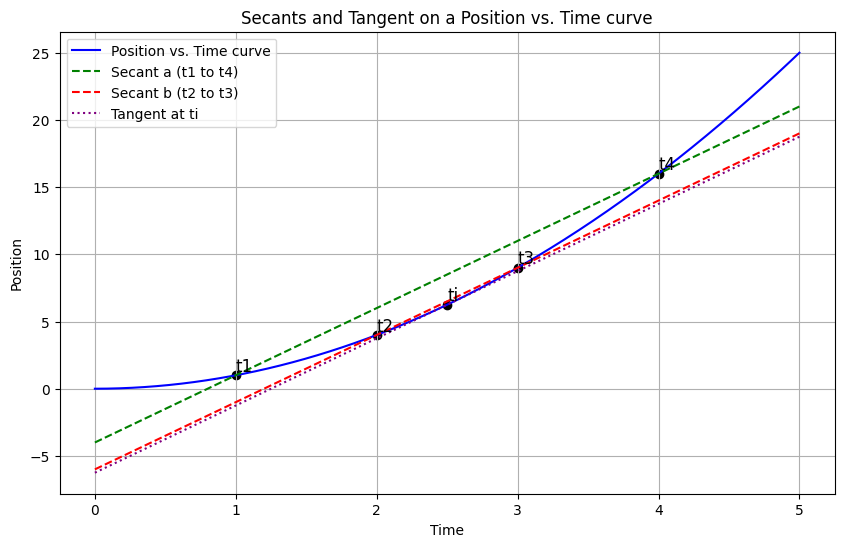

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a curva hipotética (por exemplo, uma parábola)
t = np.linspace(0, 5, 400)
s = t**2

# Definindo os pontos t1, t2, t3, t4 e ti
t1, t2, t3, t4, ti = 1, 2, 3, 4, 2.5

# Calculando os pontos na curva para t1, t2, t3, t4 e ti
s1, s2, s3, s4, si = t1**2, t2**2, t3**2, t4**2, ti**2

# Calculando as secantes
slope_a = (s4 - s1) / (t4 - t1)
slope_b = (s3 - s2) / (t3 - t2)
secant_a = slope_a * (t - t1) + s1
secant_b = slope_b * (t - t2) + s2

# Calculando a tangente em ti usando a derivada de s = t^2
slope_tangent = 2 * ti
tangent = slope_tangent * (t - ti) + si

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, s, label="Position vs. Time curve", color="blue")
plt.plot(t, secant_a, '--', label="Secant a (t1 to t4)", color="green")
plt.plot(t, secant_b, '--', label="Secant b (t2 to t3)", color="red")
plt.plot(t, tangent, ':', label="Tangent at ti", color="purple")
plt.scatter([t1, t2, t3, t4, ti], [s1, s2, s3, s4, si], color="black")
plt.text(t1, s1, 't1', fontsize=12, verticalalignment='bottom')
plt.text(t2, s2, 't2', fontsize=12, verticalalignment='bottom')
plt.text(t3, s3, 't3', fontsize=12, verticalalignment='bottom')
plt.text(t4, s4, 't4', fontsize=12, verticalalignment='bottom')
plt.text(ti, si, 'ti', fontsize=12, verticalalignment='bottom')
plt.title("Secants and Tangent on a Position vs. Time curve")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.show()


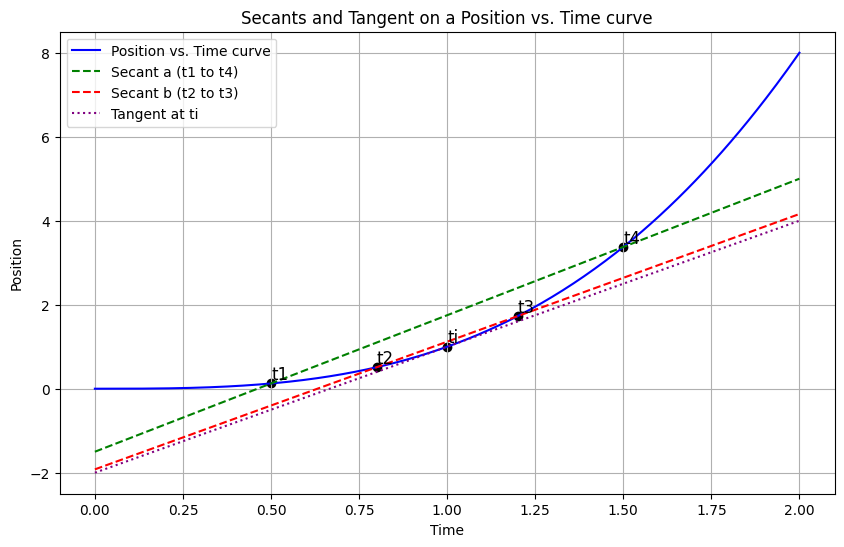

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a curva hipotética (parábola com curvatura positiva e acentuada)
t = np.linspace(0, 2, 400)
s = t**3

# Definindo os pontos t1, t2, t3, t4 e ti
t1, t2, t3, t4, ti = 0.5, 0.8, 1.2, 1.5, 1.0

# Calculando os pontos na curva para t1, t2, t3, t4 e ti
s1, s2, s3, s4, si = t1**3, t2**3, t3**3, t4**3, ti**3

# Calculando as secantes
slope_a = (s4 - s1) / (t4 - t1)
slope_b = (s3 - s2) / (t3 - t2)
secant_a = slope_a * (t - t1) + s1
secant_b = slope_b * (t - t2) + s2

# Calculando a tangente em ti usando a derivada de s = t^3
slope_tangent = 3 * ti**2
tangent = slope_tangent * (t - ti) + si

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, s, label="Position vs. Time curve", color="blue")
plt.plot(t, secant_a, '--', label="Secant a (t1 to t4)", color="green")
plt.plot(t, secant_b, '--', label="Secant b (t2 to t3)", color="red")
plt.plot(t, tangent, ':', label="Tangent at ti", color="purple")
plt.scatter([t1, t2, t3, t4, ti], [s1, s2, s3, s4, si], color="black")
plt.text(t1, s1, 't1', fontsize=12, verticalalignment='bottom')
plt.text(t2, s2, 't2', fontsize=12, verticalalignment='bottom')
plt.text(t3, s3, 't3', fontsize=12, verticalalignment='bottom')
plt.text(t4, s4, 't4', fontsize=12, verticalalignment='bottom')
plt.text(ti, si, 'ti', fontsize=12, verticalalignment='bottom')
plt.title("Secants and Tangent on a Position vs. Time curve")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import plotly.graph_objects as go

# Definindo a curva hipotética (parábola invertida com curvatura acentuada)
t = np.linspace(0, 2, 400)
s = -4 * t**2 + 8 * t  # Ajustando a curva para se assemelhar à trajetória de um projétil

# Definindo os pontos t1, t2, t3, t4 e ti
t1, t2, t3, t4, ti = 0.5, 0.8, 1.2, 1.5, 1.0

# Calculando os pontos na curva para t1, t2, t3, t4 e ti
s1, s2, s3, s4, si = -4 * t1**2 + 8 * t1, -4 * t2**2 + 8 * t2, -4 * t3**2 + 8 * t3, -4 * t4**2 + 8 * t4, -4 * ti**2 + 8 * ti

# Calculando as secantes
slope_a = (s4 - s1) / (t4 - t1)
slope_b = (s3 - s2) / (t3 - t2)
secant_a = slope_a * (t - t1) + s1
secant_b = slope_b * (t - t2) + s2

# Calculando a tangente em ti usando a derivada de s = -4t^2 + 8t
slope_tangent = -8 * ti + 8
tangent = slope_tangent * (t - ti) + si

# Criando o gráfico com Plotly
fig = go.Figure()

# Adicionando as curvas ao gráfico
fig.add_trace(go.Scatter(x=t, y=s, mode='lines', name='Curva Posição vs. Tempo', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=t, y=secant_a, mode='lines', name='Secante a (t1 até t4)', line=dict(dash='dash', color='green')))
fig.add_trace(go.Scatter(x=t, y=secant_b, mode='lines', name='Secante b (t2 até t3)', line=dict(dash='dash', color='red')))
fig.add_trace(go.Scatter(x=t, y=tangent, mode='lines', name='Tangente em ti', line=dict(dash='dot', color='purple')))
fig.add_trace(go.Scatter(x=[t1, t2, t3, t4, ti], y=[s1, s2, s3, s4, si], mode='markers+text', name='Pontos', text=['t1', 't2', 't3', 't4', 'ti'], textposition='top center', marker=dict(size=10, color='black')))

# Configurando os títulos e labels
fig.update_layout(title='Secantes e Tangente em uma Curva Posição vs. Tempo Invertida',
                  xaxis_title='Tempo',
                  yaxis_title='Posição',
                  legend_title='Legenda')

fig.show()


In [13]:
import numpy as np
import plotly.subplots as sp
import plotly.graph_objects as go

# Definindo a curva de posição (parábola invertida)
t = np.linspace(0, 2, 400)
s = -4 * t**2 + 8 * t

# Calculando a velocidade (derivada da posição) usando a diferença finita
v = np.gradient(s, t)

# Calculando a aceleração (derivada da velocidade) usando a diferença finita
a = np.gradient(v, t)

# Criando um gráfico com 3 subplots (um abaixo do outro)
fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Posição vs. Tempo', 'Velocidade vs. Tempo', 'Aceleração vs. Tempo'))

# Adicionando as curvas ao gráfico
fig.add_trace(go.Scatter(x=t, y=s, mode='lines', name='Posição'), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=v, mode='lines', name='Velocidade', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=a, mode='lines', name='Aceleração', line=dict(color='green')), row=3, col=1)

# Configurando os títulos e labels
fig.update_layout(title='Análise de Posição, Velocidade e Aceleração baseada na Derivada Finita',
                  xaxis_title='Tempo',
                  legend_title='Legenda')

# Ajustando a escala dos eixos y para melhor visualização
fig.update_yaxes(range=[-2, 8], row=1, col=1)  # Ajustando escala de posição
fig.update_yaxes(range=[-8, 8], row=2, col=1)  # Ajustando escala de velocidade
fig.update_yaxes(range=[-16, 16], row=3, col=1)  # Ajustando escala de aceleração

fig.show()


In [14]:
import numpy as np
import plotly.graph_objects as go

# Definindo a curva de posição (parábola invertida)
t = np.linspace(0, 2, 400)
s = -4 * t**2 + 8 * t

# Calculando a velocidade (derivada da posição) usando a diferença finita
v = np.gradient(s, t)

# Calculando a aceleração (derivada da velocidade) usando a diferença finita
a = np.gradient(v, t)

# Gráfico de Posição vs. Tempo
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=t, y=s, mode='lines', name='Posição'))
fig1.update_layout(title='Posição vs. Tempo', xaxis_title='Tempo', yaxis_title='Posição', legend_title='Legenda')
fig1.show()

# Gráfico de Velocidade vs. Tempo
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=t, y=v, mode='lines', name='Velocidade', line=dict(color='red')))
fig2.update_layout(title='Velocidade vs. Tempo', xaxis_title='Tempo', yaxis_title='Velocidade', legend_title='Legenda')
fig2.show()

# Gráfico de Aceleração vs. Tempo
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=t, y=a, mode='lines', name='Aceleração', line=dict(color='green')))
fig3.update_layout(title='Aceleração vs. Tempo', xaxis_title='Tempo', yaxis_title='Aceleração', legend_title='Legenda')
fig3.show()


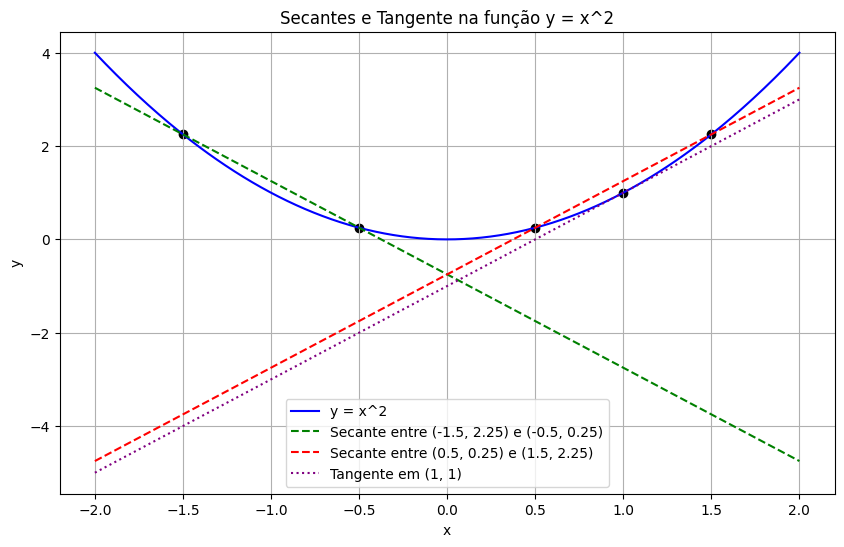

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função f(x) = x^2
x = np.linspace(-2, 2, 400)
y = x**2

# Definindo pontos para as secantes
x1, x2 = -1.5, -0.5
x3, x4 = 0.5, 1.5

# Calculando os pontos na curva
y1, y2 = x1**2, x2**2
y3, y4 = x3**2, x4**2

# Calculando as secantes
secant_1 = ((y2 - y1) / (x2 - x1)) * (x - x1) + y1
secant_2 = ((y4 - y3) / (x4 - x3)) * (x - x3) + y3

# Calculando a tangente em x=1 usando a derivada de y = x^2
xt = 1
yt = xt**2
slope_tangent = 2 * xt
tangent = slope_tangent * (x - xt) + yt

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="y = x^2", color="blue")
plt.plot(x, secant_1, '--', label="Secante entre (-1.5, 2.25) e (-0.5, 0.25)", color="green")
plt.plot(x, secant_2, '--', label="Secante entre (0.5, 0.25) e (1.5, 2.25)", color="red")
plt.plot(x, tangent, ':', label="Tangente em (1, 1)", color="purple")
plt.scatter([x1, x2, x3, x4, xt], [y1, y2, y3, y4, yt], color="black")
plt.title("Secantes e Tangente na função y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
